# Sentence embedding and sentence similarities

The objective of this work, which will continue throughout this semester, is to study the impact of the representation of words in order to understand the meaning of a sentence or, more precisely, to measure the distance between two sentences.

To do this:
* you will choose a sentence in the present tense of about 15-20 words in your mother tongue. For example for me: "the doctor invites the patient for lunch".
* Then you make a past tense version of this sentence: "the doctor has invited the patient for lunch".
* Then a version that says the opposite: "the doctor did not invite the patient for lunch".
* Then a version that says something else using similar words: "the patient invites the doctor for dinner".
* and to finish a sentence that has nothing to do with it: "could you help me".

Try to assign a score between 0 and 1 between the first and subsequent sentences. 
* 1, both sentences say the same thing
* 0, the two sentences have no link
* -1, both sentences say exactly opposite things

For example, I could put the following values: [1, 0.9, -1, -0.8, 0]

In [27]:
sentences=[
    "the doctor invited the patient for lunch",
    "the doctor has invited the patient for lunch",
    "the doctor invites the patient for lunch",
      
    "the doctor did not invite the patient for lunch",
    "the doctor invited the patient for dinner",
      
    "despite having lunch together, the patient did not like the doctor",
    "having lunch was not important for the patient and the doctor",
      
    "the doctor examined the patient before lunch",      
    
    "the invited doctor the lunch for patient", # Random
    
    "let me help you with that suitcase"]       # Another sentence

my_score = np.array([1, 0.98, 0.9, -0.8, 0.5, 0.3, 0.3, 0.3, 0.0, 0.0])

assert len(sentences)==len(my_score)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Similarity-between-vectors" data-toc-modified-id="Similarity-between-vectors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Similarity between vectors</a></span><ul class="toc-item"><li><span><a href="#Compute-similarities" data-toc-modified-id="Compute-similarities-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Compute similarities</a></span></li><li><span><a href="#Plot-similarities" data-toc-modified-id="Plot-similarities-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot similarities</a></span></li></ul></li><li><span><a href="#Bag-of-words-embeddings-(BOW)" data-toc-modified-id="Bag-of-words-embeddings-(BOW)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bag of words embeddings (BOW)</a></span></li><li><span><a href="#TextBlob-embedding" data-toc-modified-id="TextBlob-embedding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>TextBlob embedding</a></span></li><li><span><a href="#ELMO-embedding" data-toc-modified-id="ELMO-embedding-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ELMO embedding</a></span></li><li><span><a href="#Bert-embedding" data-toc-modified-id="Bert-embedding-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bert embedding</a></span></li></ul></div>

## Similarity between vectors

[cosine_similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) computes the L2-normalized dot product of vectors: $k(x, y) = \frac{xy^T}{\lVert x \rVert \lVert y \rVert}$

### Compute similarities

In [28]:
# Calculate similarities for a list of embeddings
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarities(embeddings_list):
    similarities = np.zeros((len(embeddings_list[0]), len(embeddings_list)))
    for i, embeddings in enumerate(embeddings_list):
        similarities[:,i] = cosine_similarity([embeddings[0]], embeddings)
    return similarities

In [29]:
# An example
sent = ["bla bla", "up up"]

embedding1 = [[0, 1, 2],         # Represent the first embedding for 2 sentences
              [0, 4, 1]] 

embedding2 = [[1, 1, 1],         # Represent the second embedding for the same 2 sentences
             [-1, -2, -3]]

embedding3 = [[1, 4, 5],         # Represent the second embedding for the same 2 sentences
             [1, 1, 1]]

# Calculates the similarity between the first sentence and the following ones, for each embedding.
sim = calculate_similarities([embedding1, embedding2, embedding3]) 
sim

array([[ 1.        ,  1.        ,  1.        ],
       [ 0.65079137, -0.9258201 ,  0.89087081]])

### Plot similarities

In [30]:
# For plotting similarities
# from: https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

def plot_similarities(similarities, sentences, legends):
    assert similarities.shape[0]==len(sentences)
    assert similarities.shape[1]==len(legends)
    
    fig, ax = plt.subplots(figsize=(10+similarities.shape[1],similarities.shape[0]))

    im, cbar = heatmap(similarities, sentences, legends, ax=ax, cmap="YlGn", cbarlabel="Similarities")
    texts = annotate_heatmap(im, valfmt="{x:.1f}")
    fig.tight_layout()
    plt.show()

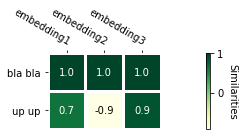

In [31]:
# An example
plot_similarities(sim, sent, ["embedding1", "embedding2", "embedding3"])

In [32]:
# What is the embedding closest to my prediction?
from sklearn.metrics import mean_absolute_error

def closest_embedding(similarities, legends):
    MAE = []
    min_ = ("", 1000)
    for app, sim in zip(legends[1:], similarities.T[1:]):
        if min_[1]>=mean_absolute_error(similarities.T[0], sim):
            min_=(app, mean_absolute_error(similarities.T[0], sim))

    print("the best approach is %s with %.2f MAE" % (min_[0], min_[1]))

In [33]:
# An example
closest_embedding(sim, ["embedding1", "embedding2, embedding3"])

the best approach is embedding2, embedding3 with 0.79 MAE


## Bag of words embeddings (BOW)

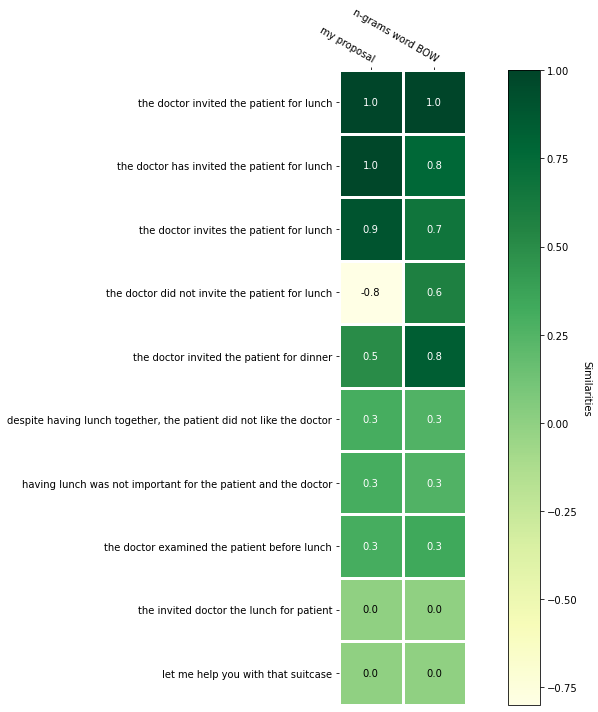

the best approach is n-grams word BOW with 0.23 MAE


In [78]:
from sklearn.feature_extraction.text import CountVectorizer

## Embedding per bi-gram of words
cv = CountVectorizer(binary=True, analyzer="word", ngram_range=(2,2), stop_words=[])
bow = cv.fit_transform(sentences)

similarities = calculate_similarities([bow.toarray()])
similarities = np.concatenate((my_score.reshape(-1,1), similarities), axis=1)
plot_similarities(similarities, sentences, ["my proposal", "n-grams word BOW"])
closest_embedding(similarities, ["my proposal", "n-grams word BOW"])

## TextBlob embedding

[TextBlob](https://textblob.readthedocs.io/en/dev/) has been one of the go-to packages for developers. It returns polarity and subjectivity of a sentence.

Polarity is a float which lies between the ranges of [-1.0,1.0].
* -1 defines a negative sentiment
* 1 defines a positive sentiment.

Subjectivity lies between [0.0,1.0].
* 0.0 is very objective and 1.0 is very subjective.
* If subjectivity < 0.5, the sentence is more subjective than objective and vice versa.

TextBlob also provides labels for semantics which allow for the detection and analysis of emojis, tones of sentence like exclamation marks, and more.

**Installation:** `pip install -U textblob` or via conda

**Usage :** `TextBlob(text).sentiment`

TextBlob offert complementary help:
* **Spelling correction:**  `TextBlob(text).correct()`
* **Noun Phrase Extraction:** `TextBlob(text).noun_phrases()`

In [79]:
''' An example
'''
from textblob import TextBlob

blob = TextBlob('companies that specialize in sentiment analysis are least likely to look at for data.') 
blob.sentiment

Sentiment(polarity=-0.15, subjectivity=0.7)

In [80]:
''' The textblob.sentiments module contains two sentiment analysis implementations,
--> PatternAnalyzer (by default, based on the pattern library)
--> NaiveBayesAnalyzer (an NLTK classifier trained on a movie reviews corpus).
'''
from textblob.sentiments import NaiveBayesAnalyzer

blob = TextBlob('companies that specialize in sentiment analysis are least likely to look at for data.', analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.7415769287224886, p_neg=0.25842307127751063)

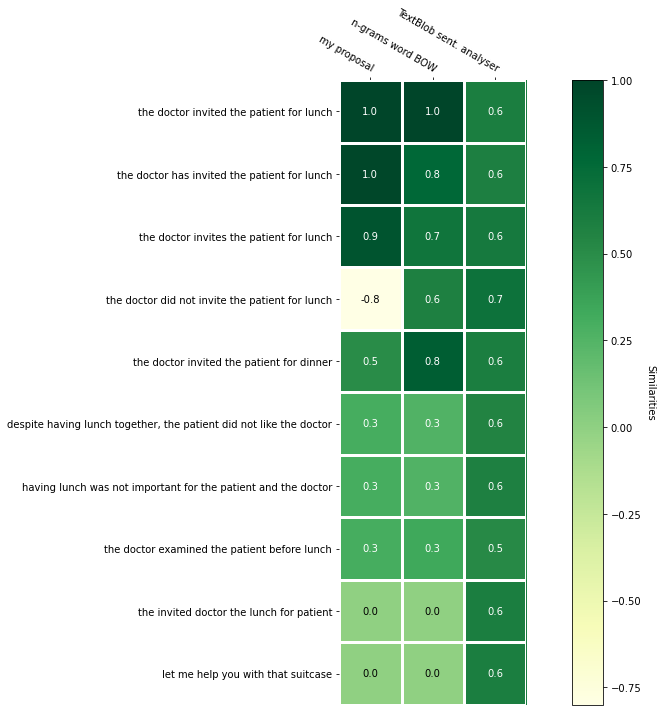

the best approach is n-grams word BOW with 0.23 MAE


In [81]:
# With my sentences

tb = []
for sent in sentences:
    sa = TextBlob(sent, analyzer=NaiveBayesAnalyzer()).sentiment
    if sa[0]=="pos":   # or sa[1]+2*sa[2]
        tb += [sa[1]]
    else:
        tb += [sa[2]]
    
similarities = np.concatenate((similarities, np.array(tb).reshape(-1,1)), axis=1)
plot_similarities(similarities, sentences, ["my proposal", "n-grams word BOW", "TextBlob sent. analyser"])
closest_embedding(similarities, ["my proposal", "n-grams word BOW", "TextBlob polarity"])

## ELMO embedding

In [82]:
import tensorflow_hub as hub
import tensorflow as tf

# temporarily disable ssl
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

elmo = hub.KerasLayer("https://tfhub.dev/google/elmo/2", trainable=False)

In [83]:
''' sentence embedding '''
elmo_emb = elmo(tf.convert_to_tensor(np.asarray(sentences)))
elmo_emb.shape

TensorShape([10, 1024])

In [84]:
elmo_sim = calculate_similarities([elmo_emb])
elmo_sim.shape

(10, 1)

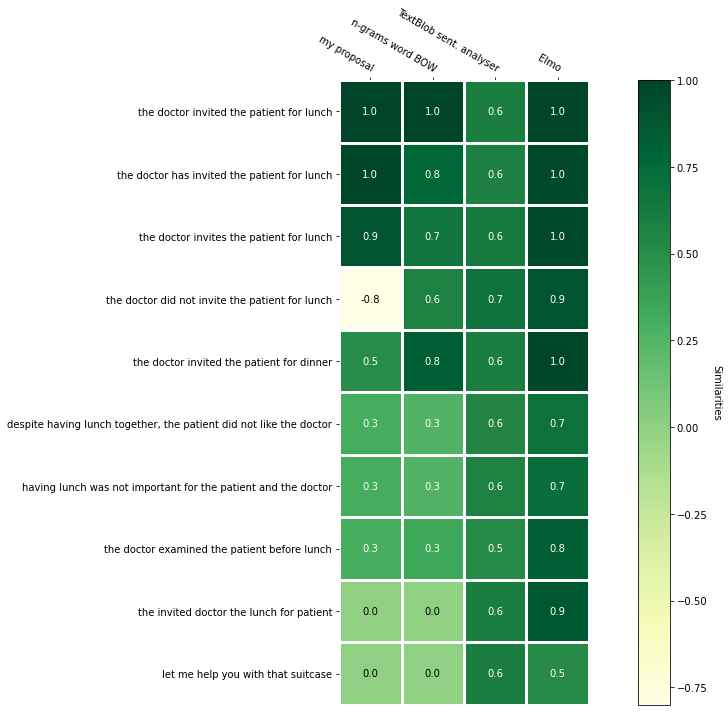

the best approach is n-grams word BOW with 0.23 MAE


In [85]:
similarities = np.concatenate((similarities, np.array(elmo_sim)), axis=1)
plot_similarities(similarities, sentences, ["my proposal", "n-grams word BOW", "TextBlob sent. analyser", "Elmo"])
closest_embedding(similarities, ["my proposal", "n-grams word BOW", "TextBlob polarity", "Elmo"])

## Bert embedding

In [86]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [87]:
bert_embedding = []
for t in sentences:
    ids = tokenizer.encode(t)
    input_ids = tf.constant(ids)
    outputs = model(input_ids[None, :])
    prediction_scores, classification_scores = outputs[:2]
    bert_embedding += [classification_scores[0]]

In [88]:
bert_sim = calculate_similarities([bert_embedding])
bert_sim.shape

(10, 1)

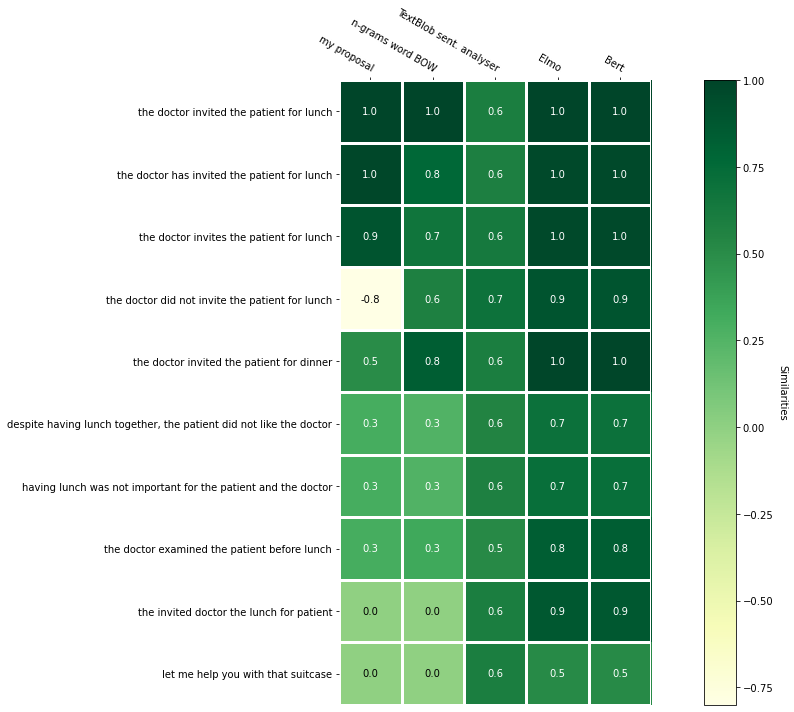

the best approach is n-grams word BOW with 0.23 MAE


In [89]:
similarities = np.concatenate((similarities, np.array(elmo_sim)), axis=1)
plot_similarities(similarities, sentences, ["my proposal", "n-grams word BOW", "TextBlob sent. analyser", "Elmo", "Bert"])
closest_embedding(similarities, ["my proposal", "n-grams word BOW", "TextBlob polarity", "Elmo", "Bert"])